# Project: Investigate a Dataset - [TMDB 5000 Movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset was taken from the [The movie database (TMDb)](https://www.kaggle.com/datasets/tmdb/themoviedb.org), containing information about 10000 movies released between the years 2015 and 1960.

__Number of Rows__: 10866

__Number of columns:__ 20

__Columns__:
- __id__ : Identification number
- __imdb_id__ : IMDb identification number
- __popularity__ : Popularity of the movie in numbers
- __budget__ : Budget of the movie
- __revenue__ : Revenue of the movie 
- __original_title__ : Title of the movie
- __cast__	: List of actors
- __homepage__	: Website homepage of the movie
- __director__	: Director of the movie
- __tagline__	: The film's advertising slogan
- __keywords__	: Keywords related to the movie
- __overview__	: Overview of the movie's plot
- __runtime__	: Screentime/How long is the movie
- __genres__	: Genre of the movie (Action, Comedy, Drama, Romance...)
- __production_companies__	: Companies that produced the movie
- __release_date__	: Release date of the movie
- __vote_count__ : Number of people voting for the movie on IMDb	
- __vote_average__	: Average vote of people voting for the movie
- __release_year__	: Release year of the movie
- __budget_adj__ : Budget of the movie with inflation from 2010 in dollars
- __revenue_adj__ : Revenue of the movie with inflation from 2010 in dollars

### Question(s) for Analysis

After taking a look at the dataset, there are multiple questions that popped out in my mind regarding some feature and the relationships between them.

**Question 1:** Which genres are the most popular from year to year ?

**Question 2:** Which movies have the most profit ? and in which year they were released ?

**Question 3:** What kind of characteristics are associated with movies having high revenues ?

**Question 4:** Which movies have the highest budgets but are low on vote counts ?

**Question 5:** Which movies have the lowest budgets but are very high on vote counts ?

**Question 6:** what are the movies that flopped and topped the most in terms of profit and votes ? and who was their cast/director ?

**Question 7:** Is the screen runtime related to the success or flopping of the movies ?

**Question 8:** What is the runtime of the most successful movies between the years 2015 and 1960 ?

**Question 9:** Which production companies that released the most successful movies each year ?

**Question 10:** Do movies with more profit have more popularity as well?

**Question 11:** What is the relationship between Budget and other features in the dataset ?

**Question 12:** Which cast participated in the most successful/flopped movies ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline 
#to make visualisations be plotted inline within the notebook

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head()

imdb_id  popularity     budget     revenue  \
id                                                     
135397  tt0369610   32.985763  150000000  1513528810   
76341   tt1392190   28.419936  150000000   378436354   
262500  tt2908446   13.112507  110000000   295238201   
140607  tt2488496   11.173104  200000000  2068178225   
168259  tt2820852    9.335014  190000000  1506249360   

                      original_title  \
id                                     
135397                Jurassic World   
76341             Mad Max: Fury Road   
262500                     Insurgent   
140607  Star Wars: The Force Awakens   
168259                     Furious 7   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                                 homepage          director  \
id                                                                            
135397                      http://www.jurassicworld.com/   Colin Trevorrow   
76341                         http://www.madmaxmovie.com/     George Miller   
262500     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
140607  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
168259                           http://www.furious7.com/         James Wan   

                              tagline  \
id                                      
135397              The park is open.   
76341              What a Lovely Day.   
262500     One Choice Can Destroy You   
140607  Every generation has a story.   
168259            Vengeance Hits Home   

                                                 keywords  \
id                                                          
135397  monster|dna|tyrannosaurus rex|velociraptor|island   
76341    future|chase|post-apocalyptic|dystopia|australia   
262500  based on novel|revolution|dystopia|sequel|dyst...   
140607              android|spaceship|jedi|space opera|3d   
168259                car race|speed|revenge|suspense|car   

                                                 overview  runtime  \
id                                                                   
135397  Twenty-two years after the events of Jurassic ...      124   
76341   An apocalyptic story set in the furthest reach...      120   
262500  Beatrice Prior must confront her inner demons ...      119   
140607  Thirty years after defeating the Galactic Empi...      136   
168259  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                           genres  \
id                                                  
135397  Action|Adventure|Science Fiction|Thriller   
76341   Action|Adventure|Science Fiction|Thriller   
262500         Adventure|Science Fiction|Thriller   
140607   Action|Adventure|Science Fiction|Fantasy   
168259                      Action|Crime|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
76341   Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
262500  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
140607          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
168259  Universal Pictures|Original Film|Media Rights ...       4/1/15   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
id                                                                          
135397        5562           6.5          2015  1.379999e+08  1.392446e+09  
76341         6185       

In [4]:
df.tail()

imdb_id  popularity  budget  revenue            original_title  \
id                                                                        
21     tt0060371    0.080598       0        0        The Endless Summer   
20379  tt0060472    0.065543       0        0                Grand Prix   
39768  tt0060161    0.065141       0        0       Beregis Avtomobilya   
21449  tt0061177    0.064317       0        0    What's Up, Tiger Lily?   
22293  tt0060666    0.035919   19000        0  Manos: The Hands of Fate   

                                                    cast homepage  \
id                                                                  
21     Michael Hynson|Robert August|Lord 'Tally Ho' B...      NaN   
20379  James Garner|Eva Marie Saint|Yves Montand|Tosh...      NaN   
39768  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      NaN   
21449  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...      NaN   
22293  Harold P. Warren|Tom Neyman|John Reynolds|Dian...      NaN   

                 director                                            tagline  \
id                                                                             
21            Bruce Brown                                                NaN   
20379  John Frankenheimer  Cinerama sweeps YOU into a drama of speed and ...   
39768      Eldar Ryazanov                                                NaN   
21449         Woody Allen                          WOODY ALLEN STRIKES BACK!   
22293    Harold P. Warren       It's Shocking! It's Beyond Your Imagination!   

                                  keywords  \
id                                           
21                surfer|surfboard|surfing   
20379            car race|racing|formula 1   
39768             car|trolley|stealing car   
21449                                spoof   
22293  fire|gun|drive|sacrifice|flashlight   

                                                overview  runtime  \
id                                                                  
21     The Endless Summer, by Bruce Brown, is one of ...       95   
20379  Grand Prix driver Pete Aron is fired by his te...      176   
39768  An insurance agent who moonlights as a carthie...       94   
21449  In comic Woody Allen's film debut, he took the...       80   
22293  A family gets lost on the road and stumbles up...       74   

                       genres  \
id                              
21                Documentary   
20379  Action|Adventure|Drama   
39768          Mystery|Comedy   
21449           Action|Comedy   
22293                  Horror   

                                    production_companies release_date  \
id                                                                      
21                                     Bruce Brown Films      6/15/66   
20379  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
39768                                            Mosfilm       1/1/66   
21449                            Benedict Pictures Corp.      11/2/66   
22293                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year     budget_adj  revenue_adj  
id                                                                         
21             11           7.4          1966       0.000000          0.0  
20379          20           5.7          1966       0.000000          0.0  
39768          11           6.5          1966       0.000000          0.0  
21449          22           5.4          1966       0.000000          0.0  
22293          15           1.5          1966  127642.279154          0.0

__We can notice that there are some columns having values separated by '|'__

In [5]:
list_1 = ['cast', 'director', 'keywords', 'genres', 'production_companies']

__Some information about the data:__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [7]:
df.shape

(10866, 20)

The dataset has 10866 rows and 20 columns

In [8]:
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000   
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748   
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07  
std        0.935142     12.812941  3.430616e+07  1.446325e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

We can notice that there are some movies having the budget and revenue equals to 0, these can be considered as NaN values.

In [9]:
l = df['original_title'].loc[(df['budget']==0.000000e+00) & (df['revenue']==0.000000e+00)].values
#select movie names where both the budget and revenue are equals to 0
l

array(['Mythica: The Darkspore', 'Me and Earl and the Dying Girl',
       'Mythica: The Necromancer', ..., 'Grand Prix',
       'Beregis Avtomobilya', "What's Up, Tiger Lily?"], dtype=object)

__Types of features__ :

In [10]:
df.dtypes

imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

We can notice that the release date is an object and not in a date_time type

__Checking for duplicate rows__:

In [11]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

checking for the duplicated row:

In [12]:
df[df.duplicated(keep=False)]

imdb_id  popularity    budget  revenue original_title  \
id                                                               
42194  tt0411951     0.59643  30000000   967000         TEKKEN   
42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                    cast homepage  \
id                                                                  
42194  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   
42194  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

               director              tagline  \
id                                             
42194  Dwight H. Little  Survival is no game   
42194  Dwight H. Little  Survival is no game   

                                                keywords  \
id                                                         
42194  martial arts|dystopia|based on video game|mart...   
42194  martial arts|dystopia|based on video game|mart...   

                                                overview  runtime  \
id                                                                  
42194  In the year of 2039, after World Wars destroy ...       92   
42194  In the year of 2039, after World Wars destroy ...       92   

                                            genres    production_companies  \
id                                                                           
42194  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
42194  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

      release_date  vote_count  vote_average  release_year  budget_adj  \
id                                                                       
42194      3/20/10         110           5.0          2010  30000000.0   
42194      3/20/10         110           5.0          2010  30000000.0   

       revenue_adj  
id                  
42194     967000.0  
42194     967000.0

__Number of rows with missing data__:

In [13]:
df.isnull().values.ravel().sum()

13434

To check if we have missing values for each feature:

In [14]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

__Checking for unique values :__

In [15]:
df.nunique()

imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [16]:
df['original_title'].unique() #names of unique movie titles

array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
       'Beregis Avtomobilya', "What's Up, Tiger Lily?",
       'Manos: The Hands of Fate'], dtype=object)

In [17]:
df['original_title'].nunique() #number of unique movie titles

10571


### Data Cleaning

I noticed that there are some columns we might not need in further analysis such as : `imdb_id` since we already have an id column, `homepage`, `tagline`, `overview`, and `keywords` since we're not doing a movie recommendation in this project.

In [18]:
df.columns

Index(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [19]:
list_2=['imdb_id','homepage','tagline', 'keywords', 'overview' ]
df.drop(columns= list_2, inplace=True)

In [20]:
df.head(1)

popularity     budget     revenue  original_title  \
id                                                          
135397   32.985763  150000000  1513528810  Jurassic World   

                                                     cast         director  \
id                                                                           
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

        runtime                                     genres  \
id                                                           
135397      124  Action|Adventure|Science Fiction|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...       6/9/15   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
id                                                                          
135397        5562           6.5          2015  1.379999e+08  1.392446e+09

__Dropping duplicates:__

In [21]:
df.drop_duplicates(inplace=True)

checking for duplicates again:

In [22]:
df.duplicated().any()

False

__Dropping null values:__

In [23]:
df.dropna(inplace=True)

checking for null values again:

In [24]:
df.isna().any()

popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

I noticed in the first part of this project that the release date of each movie is not in date format but in object format. So, we should change it:

In [25]:
df['release_date'].dtype

dtype('O')

In [26]:
release_date = pd.to_datetime(df['release_date'])

In [27]:
release_date

id
135397   2015-06-09
76341    2015-05-13
262500   2015-03-18
140607   2015-12-15
168259   2015-04-01
            ...    
21       2066-06-15
20379    2066-12-21
39768    2066-01-01
21449    2066-11-02
22293    2066-11-15
Name: release_date, Length: 9772, dtype: datetime64[ns]

__I encountered a problem where each release date written for example as '11/15/66' is going to be converted to '2066-11-15' instead of 1966 as noted in the release_year__

In [28]:
#changing the release_date year part with the release_year values :

df['release_date'] = df.apply(lambda x: x.release_date[:-2] + str(x.release_year), axis=1)
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

id
135397   2015-06-09
76341    2015-05-13
262500   2015-03-18
140607   2015-12-15
168259   2015-04-01
            ...    
21       1966-06-15
20379    1966-12-21
39768    1966-01-01
21449    1966-11-02
22293    1966-11-15
Name: release_date, Length: 9772, dtype: datetime64[ns]

as noted in the first part of the notebook, i noticed that some of the budget and revenue values are zeros:

In [29]:
df.loc[(df['budget']==0.000000e+00) & (df['revenue']==0.000000e+00)]

popularity  budget  revenue                  original_title  \
id                                                                    
347096    2.165433       0        0          Mythica: The Darkspore   
308369    2.141506       0        0  Me and Earl and the Dying Girl   
370687    1.876037       0        0        Mythica: The Necromancer   
326359    1.724712       0        0                    Frozen Fever   
254302    1.661789       0        0                       High-Rise   
...            ...     ...      ...                             ...   
5060      0.087034       0        0             Carry On Screaming!   
21        0.080598       0        0              The Endless Summer   
20379     0.065543       0        0                      Grand Prix   
39768     0.065141       0        0             Beregis Avtomobilya   
21449     0.064317       0        0          What's Up, Tiger Lily?   

                                                     cast  \
id                                                          
347096  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
308369  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
370687  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
326359  Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...   
254302  Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...   
...                                                   ...   
5060    Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...   
21      Michael Hynson|Robert August|Lord 'Tally Ho' B...   
20379   James Garner|Eva Marie Saint|Yves Montand|Tosh...   
39768   Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
21449   Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   

                       director  runtime                        genres  \
id                                                                       
347096            Anne K. Black      108      Action|Adventure|Fantasy   
308369      Alfonso Gomez-Rejon      105                  Comedy|Drama   
370687            A. Todd Smith        0      Fantasy|Action|Adventure   
326359  Chris Buck|Jennifer Lee        8    Adventure|Animation|Family   
254302             Ben Wheatley      119  Action|Drama|Science Fiction   
...                         ...      ...                           ...   
5060              Gerald Thomas       87                        Comedy   
21                  Bruce Brown       95                   Documentary   
20379        John Frankenheimer      176        Action|Adventure|Drama   
39768            Eldar Ryazanov       94                Mystery|Comedy   
21449               Woody Allen       80                 Action|Comedy   

                                     production_companies release_date  \
id                                                                       
347096                           Arrowstorm Entertainment   2015-06-24   
308369                                  Indian Paintbrush   2015-06-12   
370687  Arrowstorm Entertainment|Camera 40 Productions...   2015-12-19   
326359  Walt Disney Pictures|Walt Disney Animation Stu...   2015-03-09   
254302  Ingenious Media|HanWay Films|Scope Pictures|Re...   2015-09-26   
...                                                   ...          ...   
5060    Peter Rogers Productions|Anglo-Amalgamated Fil...   1966-05-20   
21                                      Bruce Brown Films   1966-06-15   
20379   Cherokee Productions|Joel Productions|Douglas ...   1966-12-21   
39768                                             Mosfilm   1966-01-01   
21449                             Benedict Pictures Corp.   1966-11-02   

        vote_count  vote_average  release_year  budget_adj  revenue_adj  
id                                                                       
347096          27           5.1          2015         0.0          0.0  
308369         569           7.7          2015         0.0          0.0  
370687          11           5.4          2015         0.0          

In [30]:
df.loc[df['revenue']==0.000000e+00]

popularity    budget  revenue                  original_title  \
id                                                                      
265208    2.932340  30000000        0                       Wild Card   
334074    2.331636  20000000        0                        Survivor   
347096    2.165433         0        0          Mythica: The Darkspore   
308369    2.141506         0        0  Me and Earl and the Dying Girl   
370687    1.876037         0        0        Mythica: The Necromancer   
...            ...       ...      ...                             ...   
21        0.080598         0        0              The Endless Summer   
20379     0.065543         0        0                      Grand Prix   
39768     0.065141         0        0             Beregis Avtomobilya   
21449     0.064317         0        0          What's Up, Tiger Lily?   
22293     0.035919     19000        0        Manos: The Hands of Fate   

                                                     cast  \
id                                                          
265208  Jason Statham|Michael Angarano|Milo Ventimigli...   
334074  Pierce Brosnan|Milla Jovovich|Dylan McDermott|...   
347096  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
308369  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
370687  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
...                                                   ...   
21      Michael Hynson|Robert August|Lord 'Tally Ho' B...   
20379   James Garner|Eva Marie Saint|Yves Montand|Tosh...   
39768   Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
21449   Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   
22293   Harold P. Warren|Tom Neyman|John Reynolds|Dian...   

                   director  runtime                    genres  \
id                                                               
265208           Simon West       92      Thriller|Crime|Drama   
334074       James McTeigue       96     Crime|Thriller|Action   
347096        Anne K. Black      108  Action|Adventure|Fantasy   
308369  Alfonso Gomez-Rejon      105              Comedy|Drama   
370687        A. Todd Smith        0  Fantasy|Action|Adventure   
...                     ...      ...                       ...   
21              Bruce Brown       95               Documentary   
20379    John Frankenheimer      176    Action|Adventure|Drama   
39768        Eldar Ryazanov       94            Mystery|Comedy   
21449           Woody Allen       80             Action|Comedy   
22293      Harold P. Warren       74                    Horror   

                                     production_companies release_date  \
id                                                                       
265208  Current Entertainment|Lionsgate|Sierra / Affin...   2015-01-14   
334074  Nu Image Films|Winkler Films|Millennium Films|...   2015-05-21   
347096                           Arrowstorm Entertainment   2015-06-24   
308369                                  Indian Paintbrush   2015-06-12   
370687  Arrowstorm Entertainment|Camera 40 Productions...   2015-12-19   
...                                                   ...          ...   
21                                      Bruce Brown Films   1966-06-15   
20379   Cherokee Productions|Joel Productions|Douglas ...   1966-12-21   
39768                                             Mosfilm   1966-01-01   
21449                             Benedict Pictures Corp.   1966-11-02   
22293                                           Norm-Iris   1966-11-15   

        vote_count  vote_average  release_year    budget_adj  revenue_adj  
id                                                                         
265208         481           5.3          2015  2.759999e+07          0.0  
334074         280           5.4          2015  1.839999e+07          0.0  
347096          27           5.1          2015  0.000000e+00          0.0  
308369         569           7.7          2015  0.000000e+00  

In [31]:
df.loc[df['budget']==0.000000e+00]

popularity  budget   revenue                  original_title  \
id                                                                     
280996    3.927333       0  29355203                      Mr. Holmes   
339527    3.358321       0  22354572                          Solace   
284289    2.272044       0     45895                Beyond the Reach   
347096    2.165433       0         0          Mythica: The Darkspore   
308369    2.141506       0         0  Me and Earl and the Dying Girl   
...            ...     ...       ...                             ...   
5060      0.087034       0         0             Carry On Screaming!   
21        0.080598       0         0              The Endless Summer   
20379     0.065543       0         0                      Grand Prix   
39768     0.065141       0         0             Beregis Avtomobilya   
21449     0.064317       0         0          What's Up, Tiger Lily?   

                                                     cast  \
id                                                          
280996  Ian McKellen|Milo Parker|Laura Linney|Hattie M...   
339527  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
284289  Michael Douglas|Jeremy Irvine|Hanna Mangan Law...   
347096  Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...   
308369  Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...   
...                                                   ...   
5060    Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...   
21      Michael Hynson|Robert August|Lord 'Tally Ho' B...   
20379   James Garner|Eva Marie Saint|Yves Montand|Tosh...   
39768   Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...   
21449   Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...   

                       director  runtime                    genres  \
id                                                                   
280996              Bill Condon      103             Mystery|Drama   
339527            Afonso Poyart      101       Crime|Drama|Mystery   
284289  Jean-Baptiste LÃ©onetti       95                  Thriller   
347096            Anne K. Black      108  Action|Adventure|Fantasy   
308369      Alfonso Gomez-Rejon      105              Comedy|Drama   
...                         ...      ...                       ...   
5060              Gerald Thomas       87                    Comedy   
21                  Bruce Brown       95               Documentary   
20379        John Frankenheimer      176    Action|Adventure|Drama   
39768            Eldar Ryazanov       94            Mystery|Comedy   
21449               Woody Allen       80             Action|Comedy   

                                     production_companies release_date  \
id                                                                       
280996  BBC Films|See-Saw Films|FilmNation Entertainme...   2015-06-19   
339527  Eden Rock Media|FilmNation Entertainment|Flynn...   2015-09-03   
284289                                      Furthur Films   2015-04-17   
347096                           Arrowstorm Entertainment   2015-06-24   
308369                                  Indian Paintbrush   2015-06-12   
...                                                   ...          ...   
5060    Peter Rogers Productions|Anglo-Amalgamated Fil...   1966-05-20   
21                                      Bruce Brown Films   1966-06-15   
20379   Cherokee Productions|Joel Productions|Douglas ...   1966-12-21   
39768                                             Mosfilm   1966-01-01   
21449                             Benedict Pictures Corp.   1966-11-02   

        vote_count  vote_average  release_year  budget_adj   revenue_adj  
id                                                                        
280996         425           6.4          2015         0.0  2.700677e+07  
339527         474           6.2          2015         0.0  2.056620e+07  
284289          81           5.5          2015         0.0  4.222338e+04  
347096          27          

__We notice that some of the movies have a revenue but the budget is zero and vice versa! and that is really odd and not realistic. We should change the value of each budget to the mean to make it more realistic, and vice versa__

__Checking how many zero values are there in each feature :__

In [32]:
df[['budget', 'revenue']].apply(lambda x: x == 0).sum()

budget     4751
revenue    5022
dtype: int64

We have to see first if dropping the zero values of budgets and revenues will affect our data, and the information related to each feature:

In [33]:
def entropy(Y):
    """
    Also known as Shanon Entropy
    """
    unique, count = np.unique(Y, return_counts=True, axis=0)
    prob = count/len(Y)
    en = np.sum((-1)*prob*np.log2(prob))
    return en

In [34]:
entropy(df['budget'])

4.59288636847125

In [35]:
entropy(df['revenue'])

6.899474856143105

In [36]:
df_cleaned = df[(df['budget'] != 0) & (df['revenue'] != 0)]
entropy(df_cleaned['budget'])

6.814872606606914

In [37]:
entropy(df_cleaned['revenue'])

11.833355099520029

__Increasing in shanon's entropy is an indication of information loss : We don't need to drop all the rows containing zeros in budget and revenue columns__

we can also see this impact with boxplots:

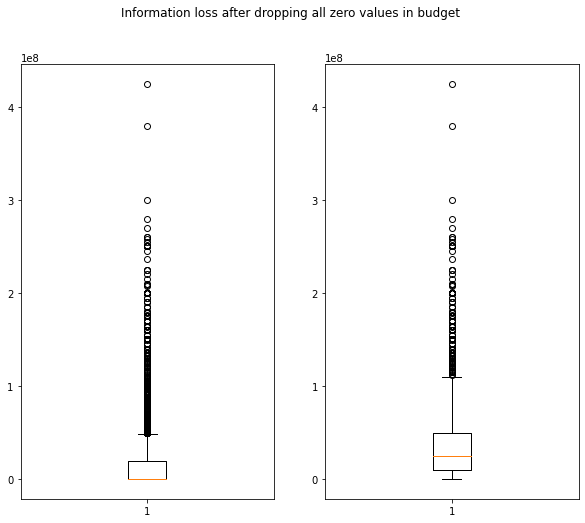

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

ax[0].boxplot(df['budget'])
ax[1].boxplot(df_cleaned['budget'])
plt.suptitle("Information loss after dropping all zero values in budget");

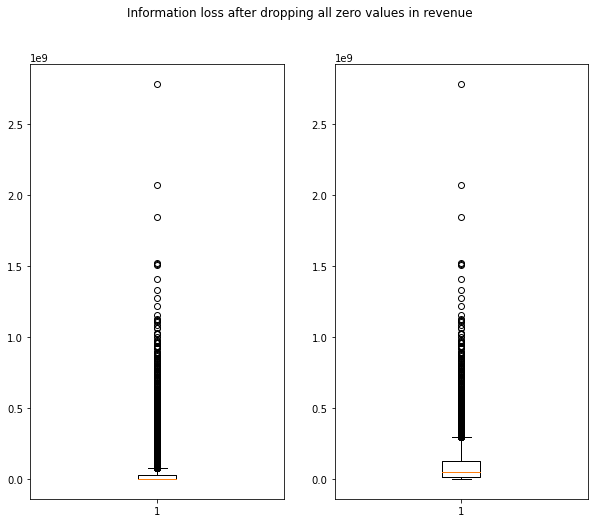

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

ax[0].boxplot(df['revenue'])
ax[1].boxplot(df_cleaned['revenue'])
plt.suptitle("Information loss after dropping all zero values in revenue");

__Grouping the budget mean by year__:

In [40]:
mean_budg = df.groupby('release_year')[['budget']].mean()
mean_budg.head(10)

budget
release_year              
1960          6.892796e+05
1961          1.537900e+06
1962          1.824071e+06
1963          2.156809e+06
1964          9.630039e+05
1965          2.064856e+06
1966          1.308064e+06
1967          2.795889e+06
1968          1.944297e+06
1969          1.452727e+06

__Grouping mean revenue by year :__

In [41]:
mean_rev = df.groupby('release_year')[['revenue']].mean()
mean_rev.head(10)

revenue
release_year              
1960          4.531406e+06
1961          1.125734e+07
1962          7.185995e+06
1963          5.511911e+06
1964          8.316629e+06
1965          1.347300e+07
1966          1.925834e+06
1967          2.049541e+07
1968          7.154945e+06
1969          8.412313e+06

__Replacing zero values of budget and revenue :__

Replacing zero values in budget when revenue isn't null:

In [42]:
zero_budg = df[(df.budget == 0) & (df.revenue != 0)] #budget equal to zero when revenue isn't null

In [43]:
"""
Function to replace zero values in budget and revenue
"""

def replace_zeros(row : pd.DataFrame, columns : list, df: pd.DataFrame):
    if (row[columns]==0).all():
        row[columns] = df.loc[row.release_year, columns]
        
    return row

In [44]:
zero_budg = zero_budg.apply(lambda x: replace_zeros(x, ['budget'], mean_budg),axis=1) #replacing budget with mean value

In [45]:
df[df.index.isin(zero_budg.index)] = zero_budg #replacing budget zero values in the dataset

check again if we filled the zero budget values when the revenue isn't null:

In [46]:
 df[(df.budget == 0) & (df.revenue != 0)]

Empty DataFrame
Columns: [popularity, budget, revenue, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

Do the same to revenue when budget isn't null but revenue is equal to zero:

In [47]:
zero_revenue = df[(df.revenue == 0) & (df.budget != 0)] #revenue zero values when the budget isn't null

In [48]:
zero_revenue = zero_revenue.apply(lambda x: replace_zeros(x, ['revenue'], mean_rev),axis=1) #replacing zero value revenues with the mean

In [49]:
df[df.index.isin(zero_revenue.index)] = zero_revenue #replacing budget zero values in the dataset

check again if we filled the zero revenue values when the budget isn't null:

In [50]:
 df[(df.budget != 0) & (df.revenue == 0)]

Empty DataFrame
Columns: [popularity, budget, revenue, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

__I also noticed that the runtime also has some zero values which is unrealistic! to tackle this problem we should replace each zero runtime with the mean value from each year__

In [51]:
zero_runtime = df[df['runtime'] == 0]
zero_runtime 

popularity     budget       revenue                 original_title  \
id                                                                           
370687    1.876037        0.0  0.000000e+00       Mythica: The Necromancer   
361931    0.357654        0.0  0.000000e+00                        Ronaldo   
353345    0.218528        0.0  0.000000e+00  The Exorcism of Molly Hartley   
333653    0.176744        0.0  0.000000e+00             If There Be Thorns   
286372    0.037459  3250000.0  3.831440e+07                      Treehouse   
286256    0.036904        0.0  0.000000e+00                       Tim Maia   
20414     0.082898        0.0  0.000000e+00       Grande, grosso e Verdone   
289097    0.095583        0.0  0.000000e+00                       Cell 213   
158150    0.026459        0.0  0.000000e+00            How to Fall in Love   
224815    0.417739        0.0  0.000000e+00               Skinwalker Ranch   
248842    0.165765        0.0  0.000000e+00         The Food Guide to Love   
191562    0.147188        0.0  0.000000e+00                    Go Goa Gone   
13713     0.071872        0.0  0.000000e+00                  Jean-Philippe   

                                                     cast  \
id                                                          
370687  Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...   
361931                                  Cristiano Ronaldo   
353345  Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...   
333653  Heather Graham|Jason Lewis|Rachael Carpani|Mas...   
286372  J. Michael Trautmann|Dana Melanie|Daniel Fredr...   
286256  Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...   
20414   Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...   
289097  Bruce Greenwood|Eric Balfour|Michael Rooker|De...   
158150  Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...   
224815  Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...   
248842  Richard Coyle|Leonor Watling|GinÃ©s GarcÃ­a Mi...   
191562     Saif Ali Khan|Anand Tiwari|Vir Das|Pooja Gupta   
13713   Fabrice Luchini|Johnny Hallyday|Jackie Berroye...   

                             director  runtime  \
id                                               
370687                  A. Todd Smith        0   
361931                  Anthony Wonke        0   
353345               Steven R. Monroe        0   
333653                   Nancy Savoca        0   
286372            Michael G. Bartlett        0   
286256                     Mauro Lima        0   
20414                   Carlo Verdone        0   
289097                    Stephen Kay        0   
158150                 Mark Griffiths        0   
224815                   Devin McGinn        0   
248842  Dominic Harari|Teresa Pelegri        0   
191562      Krishna D.K.|Raj Nidimoru        0   
13713                    Laurent Tuel        0   

                                 genres  \
id                                        
370687         Fantasy|Action|Adventure   
361931                      Documentary   
353345                           Horror   
333653                   TV Movie|Drama   
286372          Thriller|Horror|Mystery   
286256          Documentary|Drama|Music   
20414                            Family   
289097                           Horror   
158150          Comedy|Romance|TV Movie   
224815  Thriller|Horror|Science Fiction   
248842                   Romance|Comedy   
191562                    Comedy|Horror   
13713                            Comedy   

                                     production_companies release_date  \
id                                                                       
370687  Arrowstorm Entertainment|Camera 40 Productions...   2015-12-19   
361931  On The Corner Films|We Came, We Saw, We Conque...   2015-11-09   
353345                              WT Canada Productions   2015-10-09   
333653                A+E Studios|Jane Startz Productions   2015-04-05   
286372                                      Tiberius Film   2014-10-20   
286256

__Grouping the runtime by year:__

In [52]:
mean_runtime = df.groupby('release_year')[['runtime']].mean()
mean_runtime.head(10)

runtime
release_year            
1960          110.656250
1961          119.866667
1962          125.833333
1963          111.323529
1964          111.195122
1965          119.294118
1966          108.590909
1967          109.416667
1968          110.540541
1969          110.310345

In [53]:
zero_runtime  = zero_runtime .apply(lambda x: replace_zeros(x, ['runtime'], mean_runtime),axis=1) #replacing runtime with mean value
df[df.index.isin(zero_runtime.index)] = zero_runtime #replacing runtime zero values in the dataset

checking again for zero runtime:

In [54]:
df[df['runtime'] == 0]

Empty DataFrame
Columns: [popularity, budget, revenue, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

__I noticed that there is a row where we have two directors at the same time, So I'm going to use the pandas explode function to make two rows for each director__

In [55]:
df[df.index == 14938].director

id
14938    Matt Checkowski|Kurt Mattila
Name: director, dtype: object

In [56]:
def explode(df: pd.DataFrame, col: str):
    df_new = df.copy()
    df_new[col] = df_new[col].str.split("|")
    df = df_new.explode(col)
    return df
#function to split a row into two based on the name of the director split by "|"

In [57]:
explode(df, 'director')

popularity       budget       revenue                original_title  \
id                                                                            
135397   32.985763  150000000.0  1.513529e+09                Jurassic World   
76341    28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
262500   13.112507  110000000.0  2.952382e+08                     Insurgent   
140607   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
168259    9.335014  190000000.0  1.506249e+09                     Furious 7   
...            ...          ...           ...                           ...   
21        0.080598          0.0  0.000000e+00            The Endless Summer   
20379     0.065543          0.0  0.000000e+00                    Grand Prix   
39768     0.065141          0.0  0.000000e+00           Beregis Avtomobilya   
21449     0.064317          0.0  0.000000e+00        What's Up, Tiger Lily?   
22293     0.035919      19000.0  1.925834e+06      Manos: The Hands of Fate   

                                                     cast            director  \
id                                                                              
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...     Colin Trevorrow   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...       George Miller   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...    Robert Schwentke   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...         J.J. Abrams   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...           James Wan   
...                                                   ...                 ...   
21      Michael Hynson|Robert August|Lord 'Tally Ho' B...         Bruce Brown   
20379   James Garner|Eva Marie Saint|Yves Montand|Tosh...  John Frankenheimer   
39768   Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      Eldar Ryazanov   
21449   Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...         Woody Allen   
22293   Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   

        runtime                                     genres  \
id                                                           
135397    124.0  Action|Adventure|Science Fiction|Thriller   
76341     120.0  Action|Adventure|Science Fiction|Thriller   
262500    119.0         Adventure|Science Fiction|Thriller   
140607    136.0   Action|Adventure|Science Fiction|Fantasy   
168259    137.0                      Action|Crime|Thriller   
...         ...                                        ...   
21         95.0                                Documentary   
20379     176.0                     Action|Adventure|Drama   
39768      94.0                             Mystery|Comedy   
21449      80.0                              Action|Comedy   
22293      74.0                                     Horror   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341   Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
262500  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01   
...                                                   ...          ...   
21                                      Bruce Brown Films   1966-06-15   
20379   Cherokee Productions|Joel Productions|Douglas ...   1966-12-21   
39768                                             Mosfilm   1966-01-01   
21449                             Benedict Pictures Corp.   1966-11-02   
22293                                           Norm-Iris   1966-11-15   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
id                                                                          
13

checking for statistical info about the data:

In [58]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  9772.000000  9.772000e+03  9.772000e+03  9772.000000  9772.000000   
mean      0.694721  1.753632e+07  4.972249e+07   103.057654   239.312014   
std       1.036931  3.185817e+07  1.215553e+08    27.623684   603.011504   
min       0.000188  0.000000e+00  0.000000e+00     3.000000    10.000000   
25%       0.232710  0.000000e+00  0.000000e+00    91.000000    18.000000   
50%       0.419762  5.000000e+06  6.865676e+06   100.000000    46.000000   
75%       0.776408  2.000000e+07  4.946531e+07   112.000000   173.000000   
max      32.985763  4.250000e+08  2.781506e+09   877.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   9772.000000   9772.000000  9.772000e+03  9.772000e+03  
mean       5.963528   2000.878428  1.941599e+07  5.705309e+07  
std        0.913174     13.036794  3.566634e+07  1.514499e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1994.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2005.000000  3.061342e+05  0.000000e+00  
75%        6.600000   2011.000000  2.464268e+07  4.311848e+07  
max        8.700000   2015.000000  4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis


### Question1: Which genres are the most popular from year to year ?

First i want to see the distribution of each feature :

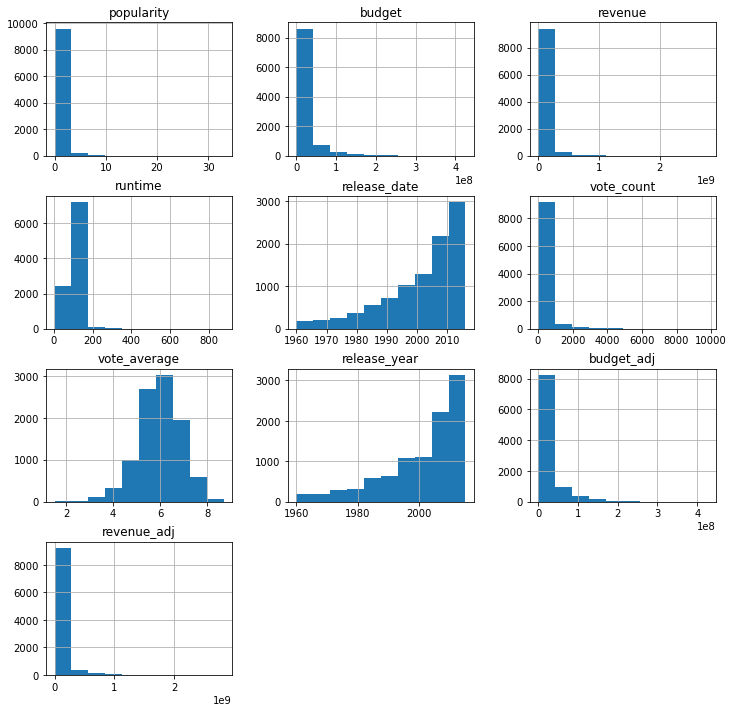

In [59]:
df.hist(figsize=(12,12));

we can see that there are some variables that are skewed either to the right such as : budget and budget_adj , or to the left such as : release_year and release_date. But some variables have a normal distribution such as vote_average

__Distribution of popularity__:

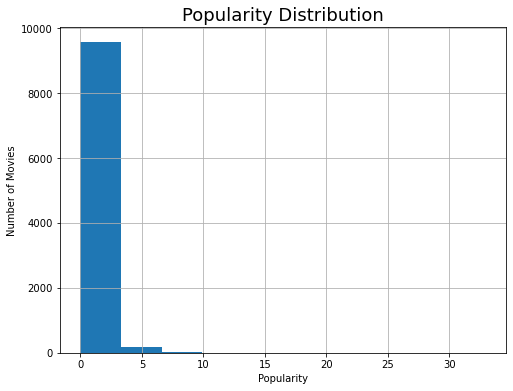

In [60]:
df.popularity.hist(figsize=(8, 6))
plt.title("Popularity Distribution", fontsize=18);
plt.xlabel("Popularity")
plt.ylabel("Number of Movies")
plt.show();

__Most popular movie of all between the years 2015 and 1960 :__

In [61]:
df.loc[df['popularity'].idxmax()] #idxmax : returns the index of the first occurrence of maximum over requested column 

popularity                                                      32.985763
budget                                                        150000000.0
revenue                                                      1513528810.0
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director                                                  Colin Trevorrow
runtime                                                             124.0
genres                          Action|Adventure|Science Fiction|Thriller
production_companies    Universal Studios|Amblin Entertainment|Legenda...
release_date                                          2015-06-09 00:00:00
vote_count                                                           5562
vote_average                                                          6.5
release_year                                                         2015
budget_adj                            

Most popular movie : __Jurassic World(2015)__ 

In [62]:
#most popular movies :

most_pop = df.sort_values('popularity', axis=0, ascending=False).head(10)
most_pop

popularity       budget       revenue  \
id                                              
135397   32.985763  150000000.0  1.513529e+09   
76341    28.419936  150000000.0  3.784364e+08   
157336   24.949134  165000000.0  6.217525e+08   
118340   14.311205  170000000.0  7.733124e+08   
262500   13.112507  110000000.0  2.952382e+08   
100402   12.971027  170000000.0  7.147666e+08   
11       12.037933   11000000.0  7.753980e+08   
245891   11.422751   20000000.0  7.873990e+07   
140607   11.173104  200000000.0  2.068178e+09   
131631   10.739009  125000000.0  7.521002e+08   

                               original_title  \
id                                              
135397                         Jurassic World   
76341                      Mad Max: Fury Road   
157336                           Interstellar   
118340                Guardians of the Galaxy   
262500                              Insurgent   
100402    Captain America: The Winter Soldier   
11                                  Star Wars   
245891                              John Wick   
140607           Star Wars: The Force Awakens   
131631  The Hunger Games: Mockingjay - Part 1   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
157336  Matthew McConaughey|Jessica Chastain|Anne Hath...   
118340  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
100402  Chris Evans|Scarlett Johansson|Sebastian Stan|...   
11      Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   
245891  Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
131631  Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   

                           director  runtime  \
id                                             
135397              Colin Trevorrow    124.0   
76341                 George Miller    120.0   
157336            Christopher Nolan    169.0   
118340                   James Gunn    121.0   
262500             Robert Schwentke    119.0   
100402      Joe Russo|Anthony Russo    136.0   
11                     George Lucas    121.0   
245891  Chad Stahelski|David Leitch    101.0   
140607                  J.J. Abrams    136.0   
131631             Francis Lawrence    123.0   

                                           genres  \
id                                                  
135397  Action|Adventure|Science Fiction|Thriller   
76341   Action|Adventure|Science Fiction|Thriller   
157336            Adventure|Drama|Science Fiction   
118340           Action|Science Fiction|Adventure   
262500         Adventure|Science Fiction|Thriller   
100402           Action|Adventure|Science Fiction   
11               Adventure|Action|Science Fiction   
245891                            Action|Thriller   
140607   Action|Adventure|Science Fiction|Fantasy   
131631         Science Fiction|Adventure|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341   Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
157336  Paramount Pictures|Legendary Pictures|Warner B...   2014-11-05   
118340  Marvel Studios|Moving Picture Company (MPC)|Bu...   2014-07-30   
262500  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
100402                                     Marvel Studios   2014-03-20   
11       Lucasfilm|Twentieth Century Fox Film Corporation   1977-03-20   
245891  Thunder Road Pictures|Warner Bros.|87Eleven|De...   2014-10-22   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
131631                              Lionsgate|Color Force   2014-11-1

In [63]:
most_pop_by_year = most_pop.groupby(['release_year'])['genres'].value_counts()
most_pop_by_year

release_year  genres                                   
1977          Adventure|Action|Science Fiction             1
2014          Action|Adventure|Science Fiction             1
              Action|Science Fiction|Adventure             1
              Action|Thriller                              1
              Adventure|Drama|Science Fiction              1
              Science Fiction|Adventure|Thriller           1
2015          Action|Adventure|Science Fiction|Thriller    2
              Action|Adventure|Science Fiction|Fantasy     1
              Adventure|Science Fiction|Thriller           1
Name: genres, dtype: int64

we can see that most popular genres between 2015 and 1960 are : __Action, Adventure, Science Fiction and Thriller__

### Question 2: Which movies have the most profit ? and in which year they were released ?

profit of movies:

In [64]:
df['profit'] = df.revenue - df.budget
df.profit.head()

id
135397    1.363529e+09
76341     2.284364e+08
262500    1.852382e+08
140607    1.868178e+09
168259    1.316249e+09
Name: profit, dtype: float64

In [65]:
df.profit.describe()

count    9.772000e+03
mean     3.218616e+07
std      1.006611e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      3.244257e+07
max      2.544506e+09
Name: profit, dtype: float64

__movies having the most profit (having profit > 75%):__

In [66]:
successful_movies = df[df.profit >= 3.244257e+07]
successful_movies.sort_values('profit', axis=0, ascending=False).head(5)

popularity       budget       revenue                original_title  \
id                                                                            
19995     9.432768  237000000.0  2.781506e+09                        Avatar   
140607   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
597       4.355219  200000000.0  1.845034e+09                       Titanic   
135397   32.985763  150000000.0  1.513529e+09                Jurassic World   
168259    9.335014  190000000.0  1.506249e+09                     Furious 7   

                                                     cast         director  \
id                                                                           
19995   Sam Worthington|Zoe Saldana|Sigourney Weaver|S...    James Cameron   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...      J.J. Abrams   
597     Kate Winslet|Leonardo DiCaprio|Frances Fisher|...    James Cameron   
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...        James Wan   

        runtime                                     genres  \
id                                                           
19995     162.0   Action|Adventure|Fantasy|Science Fiction   
140607    136.0   Action|Adventure|Science Fiction|Fantasy   
597       194.0                     Drama|Romance|Thriller   
135397    124.0  Action|Adventure|Science Fiction|Thriller   
168259    137.0                      Action|Crime|Thriller   

                                     production_companies release_date  \
id                                                                       
19995   Ingenious Film Partners|Twentieth Century Fox ...   2009-12-10   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
597     Paramount Pictures|Twentieth Century Fox Film ...   1997-11-18   
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  \
id                                                                           
19995         8458           7.1          2009  2.408869e+08  2.827124e+09   
140607        5292           7.5          2015  1.839999e+08  1.902723e+09   
597           4654           7.3          1997  2.716921e+08  2.506406e+09   
135397        5562           6.5          2015  1.379999e+08  1.392446e+09   
168259        2947           7.3          2015  1.747999e+08  1.385749e+09   

              profit  
id                    
19995   2.544506e+09  
140607  1.868178e+09  
597     1.645034e+09  
135397  1.363529e+09  
168259  1.316249e+09

In [67]:
successful_movies.groupby('release_year')['original_title'].value_counts()

release_year  original_title                
1960          Spartacus                         1
1961          One Hundred and One Dalmatians    1
              West Side Story                   1
1962          Dr. No                            1
              How the West Was Won              1
                                               ..
2015          Unfriended                        1
              Vacation                          1
              Vice                              1
              War Room                          1
              Woman in Gold                     1
Name: original_title, Length: 2443, dtype: int64

### Question 3: What kind of characteristics are associated with movies having high revenues ?

In [68]:
df.revenue.describe()

count    9.772000e+03
mean     4.972249e+07
std      1.215553e+08
min      0.000000e+00
25%      0.000000e+00
50%      6.865676e+06
75%      4.946531e+07
max      2.781506e+09
Name: revenue, dtype: float64

__movies having the highest revenues (having revenues > 75%):__

In [69]:
high_movies = df[df.revenue >= 4.946531e+07]
high_movies.head(5)

popularity       budget       revenue                original_title  \
id                                                                            
135397   32.985763  150000000.0  1.513529e+09                Jurassic World   
76341    28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
262500   13.112507  110000000.0  2.952382e+08                     Insurgent   
140607   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
168259    9.335014  190000000.0  1.506249e+09                     Furious 7   

                                                     cast          director  \
id                                                                            
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

        runtime                                     genres  \
id                                                           
135397    124.0  Action|Adventure|Science Fiction|Thriller   
76341     120.0  Action|Adventure|Science Fiction|Thriller   
262500    119.0         Adventure|Science Fiction|Thriller   
140607    136.0   Action|Adventure|Science Fiction|Fantasy   
168259    137.0                      Action|Crime|Thriller   

                                     production_companies release_date  \
id                                                                       
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
76341   Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
262500  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  \
id                                                                           
135397        5562           6.5          2015  1.379999e+08  1.392446e+09   
76341         6185           7.1          2015  1.379999e+08  3.481613e+08   
262500        2480           6.3          2015  1.012000e+08  2.716190e+08   
140607        5292           7.5          2015  1.839999e+08  1.902723e+09   
168259        2947           7.3          2015  1.747999e+08  1.385749e+09   

              profit  
id                    
135397  1.363529e+09  
76341   2.284364e+08  
262500  1.852382e+08  
140607  1.868178e+09  
168259  1.316249e+09

In [70]:
high_movies.describe()

popularity        budget       revenue      runtime   vote_count  \
count  2389.000000  2.389000e+03  2.389000e+03  2389.000000  2389.000000   
mean      1.469329  4.887598e+07  1.730065e+08   111.191712   720.071578   
std       1.750423  4.765504e+07  1.990198e+08    27.111858  1039.334704   
min       0.010335  3.000000e+00  4.946990e+07     4.000000    10.000000   
25%       0.555793  1.500000e+07  6.064831e+07    96.000000   115.000000   
50%       1.042281  3.500000e+07  1.011341e+08   107.000000   333.000000   
75%       1.765322  6.800000e+07  1.967812e+08   122.000000   852.000000   
max      32.985763  3.800000e+08  2.781506e+09   705.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj        profit  
count   2389.000000   2389.000000  2.389000e+03  2.389000e+03  2.389000e+03  
mean       6.163541   2002.665132  5.557735e+07  2.036979e+08  1.241305e+08  
std        0.820476      9.606977  5.037612e+07  2.524806e+08  1.717937e+08  
min        2.900000   1960.000000  0.000000e+00  0.000000e+00 -1.657101e+08  
25%        5.600000   1998.000000  1.847232e+07  6.513691e+07  4.210000e+07  
50%        6.200000   2004.000000  4.075381e+07  1.269177e+08  6.414683e+07  
75%        6.700000   2010.000000  8.000000e+07  2.562076e+08  1.406639e+08  
max        8.300000   2015.000000  3.683713e+08  2.827124e+09  2.544506e+09

In [71]:
high_movies[['original_title', 'popularity', 'release_date', 'profit', 'budget', 'revenue', 'vote_average']]

original_title  popularity release_date        profit  \
id                                                                            
135397                Jurassic World   32.985763   2015-06-09  1.363529e+09   
76341             Mad Max: Fury Road   28.419936   2015-05-13  2.284364e+08   
262500                     Insurgent   13.112507   2015-03-18  1.852382e+08   
140607  Star Wars: The Force Awakens   11.173104   2015-12-15  1.868178e+09   
168259                     Furious 7    9.335014   2015-04-01  1.316249e+09   
...                              ...         ...          ...           ...   
948                        Halloween    1.198849   1978-10-25  6.970000e+07   
8469                    Animal House    1.157930   1978-07-27  1.383000e+08   
6081     Revenge of the Pink Panther    1.090065   1978-07-19  4.615309e+07   
11778                The Deer Hunter    0.959754   1978-12-08  3.500000e+07   
16214                         Hooper    0.044675   1978-07-28  7.457382e+07   

              budget       revenue  vote_average  
id                                                
135397  1.500000e+08  1.513529e+09           6.5  
76341   1.500000e+08  3.784364e+08           7.1  
262500  1.100000e+08  2.952382e+08           6.3  
140607  2.000000e+08  2.068178e+09           7.5  
168259  1.900000e+08  1.506249e+09           7.3  
...              ...           ...           ...  
948     3.000000e+05  7.000000e+07           7.3  
8469    2.700000e+06  1.410000e+08           6.7  
6081    3.426181e+06  4.957927e+07           6.2  
11778   1.500000e+07  5.000000e+07           7.4  
16214   3.426181e+06  7.800000e+07           6.0  

[2389 rows x 7 columns]

### Question 4: Which movies have the highest budgets but are low on vote counts ?

In [72]:
m =df.loc[(df['budget'] > df['budget'].quantile(0.75)) & (df['vote_count'] < df['vote_count'].quantile(0.25))]
m[['original_title', 'release_date', 'budget', 'vote_count']]

original_title release_date        budget  \
id                                                                          
254263  The Swan Princess: A Royal Family Tale   2014-02-25  3.000000e+07   
242166                                 Red Sky   2014-03-12  2.500000e+07   
33870                        Mao's Last Dancer   2009-10-01  2.500000e+07   
66193                       Sinners and Saints   2010-09-14  2.221868e+07   
48495                           Double Wedding   2010-07-20  1.040024e+08   
...                                        ...          ...           ...   
2071                                 Shattered   1991-10-11  2.200000e+07   
6470                                Fire Birds   1990-05-25  2.200000e+07   
22414                  Postcards from the Edge   1990-09-12  2.200000e+07   
46828                  Son of the Pink Panther   1993-01-01  2.500000e+07   
33157                                 Waterloo   1970-10-26  2.500000e+07   

        vote_count  
id                  
254263          14  
242166          16  
33870           16  
66193           16  
48495           12  
...            ...  
2071            11  
6470            15  
22414           15  
46828           15  
33157           10  

[95 rows x 4 columns]

### Question 5: Which movies have the lowest budgets but are very high on vote counts ?

In [73]:
m_2 =df.loc[(df['budget'] < df['budget'].quantile(0.25)) & (df['vote_count'] > df['vote_count'].quantile(0.75))]
m_2[['original_title', 'release_date', 'budget', 'vote_count']]

Empty DataFrame
Columns: [original_title, release_date, budget, vote_count]
Index: []

it seems to be that there are no low budget movies that have very high vote counts

### Question 6: what are the movies that flopped and topped the most in terms of profit and votes ? and who was their cast/director ?


In [74]:
#successful movies:
s= successful_movies.where(successful_movies['vote_count']> successful_movies['vote_count'].quantile(0.75))
s[['original_title', 'cast', 'director', 'release_date']].head(15)

original_title  \
id                                     
135397                Jurassic World   
76341             Mad Max: Fury Road   
262500                     Insurgent   
140607  Star Wars: The Force Awakens   
168259                     Furious 7   
281957                  The Revenant   
87101             Terminator Genisys   
286217                   The Martian   
211672                       Minions   
150540                    Inside Out   
206647                       Spectre   
257344                        Pixels   
99861        Avengers: Age of Ultron   
273248             The Hateful Eight   
260346                       Taken 3   

                                                     cast  \
id                                                          
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
281957  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
87101   Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
286217  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
211672  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
150540  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   
206647  Daniel Craig|Christoph Waltz|LÃ©a Seydoux|Ralp...   
257344  Adam Sandler|Michelle Monaghan|Peter Dinklage|...   
99861   Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...   
273248  Samuel L. Jackson|Kurt Russell|Jennifer Jason ...   
260346  Liam Neeson|Forest Whitaker|Maggie Grace|Famke...   

                              director release_date  
id                                                   
135397                 Colin Trevorrow   2015-06-09  
76341                    George Miller   2015-05-13  
262500                Robert Schwentke   2015-03-18  
140607                     J.J. Abrams   2015-12-15  
168259                       James Wan   2015-04-01  
281957  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   2015-12-25  
87101                      Alan Taylor   2015-06-23  
286217                    Ridley Scott   2015-09-30  
211672        Kyle Balda|Pierre Coffin   2015-06-17  
150540                     Pete Docter   2015-06-09  
206647                      Sam Mendes   2015-10-26  
257344                  Chris Columbus   2015-07-16  
99861                      Joss Whedon   2015-04-22  
273248               Quentin Tarantino   2015-12-25  
260346                 Olivier Megaton   2015-01-01

In [75]:
#flopped movies:

flopped_movies = df[df.profit < 3.244257e+07]
flopped_movies[['original_title', 'cast', 'director', 'release_date']].head(15)

original_title                                               cast  \
id                                                                              
76757    Jupiter Ascending  Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...   
264660          Ex Machina  Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...   
158852        Tomorrowland  Britt Robertson|George Clooney|Raffey Cassidy|...   
280996          Mr. Holmes  Ian McKellen|Milo Parker|Laura Linney|Hattie M...   
264644                Room  Brie Larson|Jacob Tremblay|Joan Allen|Sean Bri...   
339527              Solace  Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...   
241554       Run All Night  Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...   
321697          Steve Jobs  Michael Fassbender|Kate Winslet|Seth Rogen|Kat...   
293863  The Age of Adaline  Blake Lively|Michiel Huisman|Harrison Ford|Ell...   
325348      Hardcore Henry  Sharlto Copley|Haley Bennett|Danila Kozlovskiy...   
265208           Wild Card  Jason Statham|Michael Angarano|Milo Ventimigli...   
254320         The Lobster  Colin Farrell|Rachel Weisz|LÃ©a Seydoux|John C...   
258480               Carol  Cate Blanchett|Rooney Mara|Kyle Chandler|Sarah...   
257088         Point Break  Edgar RamÃ­rez|Luke Bracey|Teresa Palmer|Delro...   
295964               Burnt  Bradley Cooper|Sienna Miller|Lily James|Alicia...   

                              director release_date  
id                                                   
76757   Lana Wachowski|Lilly Wachowski   2015-02-04  
264660                    Alex Garland   2015-01-21  
158852                       Brad Bird   2015-05-19  
280996                     Bill Condon   2015-06-19  
264644                Lenny Abrahamson   2015-10-16  
339527                   Afonso Poyart   2015-09-03  
241554              Jaume Collet-Serra   2015-03-11  
321697                     Danny Boyle   2015-10-09  
293863              Lee Toland Krieger   2015-04-16  
325348                 Ilya Naishuller   2015-09-12  
265208                      Simon West   2015-01-14  
254320                Yorgos Lanthimos   2015-10-08  
258480                     Todd Haynes   2015-11-20  
257088                    Ericson Core   2015-12-03  
295964                      John Wells   2015-10-02

### Question 7: Is the screen runtime related to the success or flopping of the movies ?


In [92]:
import plotly.express as px
figure = px.scatter(data_frame = df, 
                    x="runtime",
                    y="popularity", 
                    size="runtime", 
                    trendline="ols", 
                    title = "Relationship Between Runtime and Popularity")
figure.show()

Runtime and poularity aren't correlated

### Question 8: What is the runtime of the most successful movies between the years 2015 and 1960 ?


In [77]:
s.sort_values('popularity', axis=0, ascending=False).head(10).groupby(['runtime', 'release_year'])['original_title'].sum()

runtime  release_year
101.0    2014.0                                      John Wick
119.0    2015.0                                      Insurgent
120.0    2015.0                             Mad Max: Fury Road
121.0    1977.0                                      Star Wars
         2014.0                        Guardians of the Galaxy
123.0    2014.0          The Hunger Games: Mockingjay - Part 1
124.0    2015.0                                 Jurassic World
136.0    2014.0            Captain America: The Winter Soldier
         2015.0                   Star Wars: The Force Awakens
169.0    2014.0                                   Interstellar
Name: original_title, dtype: object

### **Question 9:** Do movies with more profit have more popularity as well?

In [78]:
most_pop['profit'] = df.profit

most_successful = successful_movies.sort_values('profit', axis=0, ascending=False).head(10)
most_successful

popularity       budget       revenue  \
id                                              
19995     9.432768  237000000.0  2.781506e+09   
140607   11.173104  200000000.0  2.068178e+09   
597       4.355219  200000000.0  1.845034e+09   
135397   32.985763  150000000.0  1.513529e+09   
168259    9.335014  190000000.0  1.506249e+09   
24428     7.637767  220000000.0  1.519558e+09   
12445     5.711315  125000000.0  1.327818e+09   
99861     5.944927  280000000.0  1.405036e+09   
109445    6.112766  150000000.0  1.274219e+09   
1642      1.136610   22000000.0  1.106280e+09   

                                      original_title  \
id                                                     
19995                                         Avatar   
140607                  Star Wars: The Force Awakens   
597                                          Titanic   
135397                                Jurassic World   
168259                                     Furious 7   
24428                                   The Avengers   
12445   Harry Potter and the Deathly Hallows: Part 2   
99861                        Avengers: Age of Ultron   
109445                                        Frozen   
1642                                         The Net   

                                                     cast  \
id                                                          
19995   Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
597     Kate Winslet|Leonardo DiCaprio|Frances Fisher|...   
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
24428   Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...   
12445   Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...   
99861   Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...   
109445  Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...   
1642    Sandra Bullock|Jeremy Northam|Dennis Miller|We...   

                       director  runtime  \
id                                         
19995             James Cameron    162.0   
140607              J.J. Abrams    136.0   
597               James Cameron    194.0   
135397          Colin Trevorrow    124.0   
168259                James Wan    137.0   
24428               Joss Whedon    143.0   
12445               David Yates    130.0   
99861               Joss Whedon    141.0   
109445  Chris Buck|Jennifer Lee    102.0   
1642              Irwin Winkler    114.0   

                                           genres  \
id                                                  
19995    Action|Adventure|Fantasy|Science Fiction   
140607   Action|Adventure|Science Fiction|Fantasy   
597                        Drama|Romance|Thriller   
135397  Action|Adventure|Science Fiction|Thriller   
168259                      Action|Crime|Thriller   
24428            Science Fiction|Action|Adventure   
12445                    Adventure|Family|Fantasy   
99861            Action|Adventure|Science Fiction   
109445                 Animation|Adventure|Family   
1642          Crime|Drama|Mystery|Thriller|Action   

                                     production_companies release_date  \
id                                                                       
19995   Ingenious Film Partners|Twentieth Century Fox ...   2009-12-10   
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
597     Paramount Pictures|Twentieth Century Fox Film ...   1997-11-18   
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01   
24428                                      Marvel Studios   2012-04-25   
12445   Warner Bros.|Heyday Films|Moving Picture Compa...   2011-07-07   
99861   Marvel Studios|Prime Focus|Revolution Sun Studios   2015-04-22   
109445  Walt Disney Pictures|Walt Disney Animation Stu...   2013-11-27   
1642                             

In [79]:
most_pop[['original_title', 'popularity', 'release_date', 'profit']]

original_title  popularity release_date  \
id                                                                       
135397                         Jurassic World   32.985763   2015-06-09   
76341                      Mad Max: Fury Road   28.419936   2015-05-13   
157336                           Interstellar   24.949134   2014-11-05   
118340                Guardians of the Galaxy   14.311205   2014-07-30   
262500                              Insurgent   13.112507   2015-03-18   
100402    Captain America: The Winter Soldier   12.971027   2014-03-20   
11                                  Star Wars   12.037933   1977-03-20   
245891                              John Wick   11.422751   2014-10-22   
140607           Star Wars: The Force Awakens   11.173104   2015-12-15   
131631  The Hunger Games: Mockingjay - Part 1   10.739009   2014-11-18   

              profit  
id                    
135397  1.363529e+09  
76341   2.284364e+08  
157336  4.567525e+08  
118340  6.033124e+08  
262500  1.852382e+08  
100402  5.447666e+08  
11      7.643980e+08  
245891  5.873990e+07  
140607  1.868178e+09  
131631  6.271002e+08

__Pie Chart representing profit of successful movies VS profit of popular ones :__

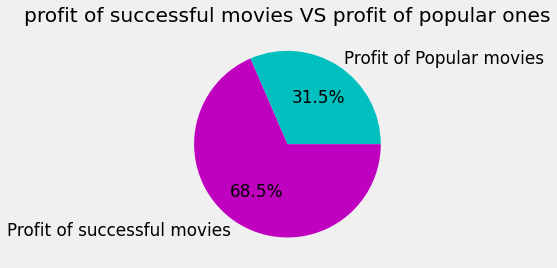

In [98]:
plt.pie([most_pop.profit.sum(), most_successful.profit.sum()],
    labels=['Profit of Popular movies', 'Profit of successful movies'],
    colors=['c', 'm'], autopct='%.1f%%',
    textprops={'size': 'large'});
plt.title("profit of successful movies VS profit of popular ones")
plt.show();

__percentage of popular movies that have highest profit :__

In [81]:
perc = (most_pop.index.isin(most_successful.index).sum()) / most_pop.shape[0] * 100

#most_pop.shape[0] : number of columns of most_pop
perc

20.0

We can notice that having the most profit doesn't mean the movie is also popular, also we have only 20% of the popular movies having also the highest profit

### Question 10: Which production companies that released the most successful movies each year ?


In [82]:
s[['original_title', 'production_companies', 'release_date']].head(15)

original_title  \
id                                     
135397                Jurassic World   
76341             Mad Max: Fury Road   
262500                     Insurgent   
140607  Star Wars: The Force Awakens   
168259                     Furious 7   
281957                  The Revenant   
87101             Terminator Genisys   
286217                   The Martian   
211672                       Minions   
150540                    Inside Out   
206647                       Spectre   
257344                        Pixels   
99861        Avengers: Age of Ultron   
273248             The Hateful Eight   
260346                       Taken 3   

                                     production_companies release_date  
id                                                                      
135397  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09  
76341   Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13  
262500  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18  
140607          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15  
168259  Universal Pictures|Original Film|Media Rights ...   2015-04-01  
281957  Regency Enterprises|Appian Way|CatchPlay|Anony...   2015-12-25  
87101             Paramount Pictures|Skydance Productions   2015-06-23  
286217  Twentieth Century Fox Film Corporation|Scott F...   2015-09-30  
211672      Universal Pictures|Illumination Entertainment   2015-06-17  
150540  Walt Disney Pictures|Pixar Animation Studios|W...   2015-06-09  
206647                       Columbia Pictures|Danjaq|B24   2015-10-26  
257344        Columbia Pictures|Happy Madison Productions   2015-07-16  
99861   Marvel Studios|Prime Focus|Revolution Sun Studios   2015-04-22  
273248  Double Feature Films|The Weinstein Company|Fil...   2015-12-25  
260346  Twentieth Century Fox Film Corporation|M6 Film...   2015-01-01

In [83]:
s.groupby('release_year')['production_companies'].sum()

release_year
1961.0                              Walt Disney Productions
1967.0                                 Walt Disney Pictures
1968.0    Stanley Kubrick Productions|Metro-Goldwyn-Maye...
1972.0                Paramount Pictures|Alfran Productions
1973.0                        Warner Bros.|Hoya Productions
1974.0               Paramount Pictures|The Coppola Company
1975.0    Fantasy Films|Warner Bros.Universal Pictures|Z...
1976.0                                       United Artists
1977.0     Lucasfilm|Twentieth Century Fox Film Corporation
1979.0    Twentieth Century-Fox Productions|Brandywine P...
1980.0     Lucasfilm|Twentieth Century Fox Film Corporation
1981.0                         Lucasfilm|Paramount Pictures
1982.0    Universal Pictures|Amblin EntertainmentOrion P...
1983.0    Lucasfilm|Twentieth Century Fox Film Corporati...
1984.0    Orion Pictures|Pacific Western|Hemdale Film|Ci...
1985.0    Universal Pictures|Amblin Entertainment|U-Driv...
1986.0    Twentieth Century

### Question 11: What is the relationship between Budget and other features in the dataset ?

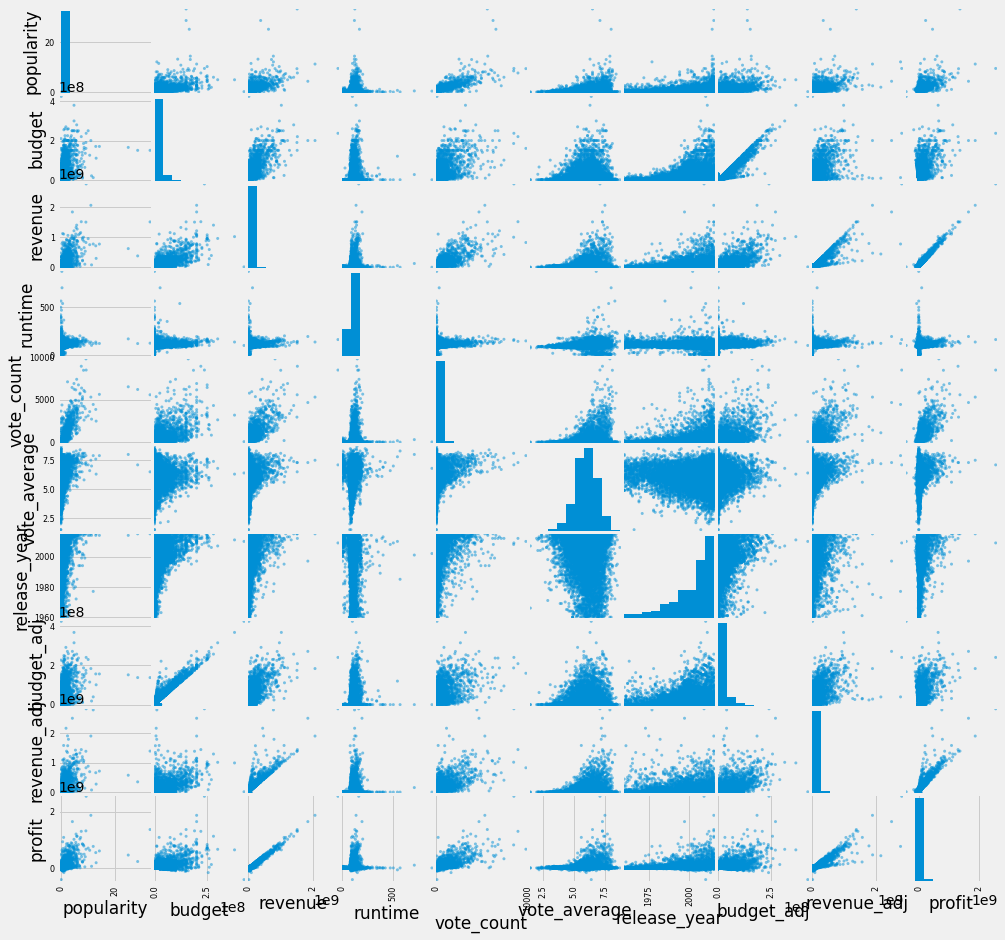

In [102]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

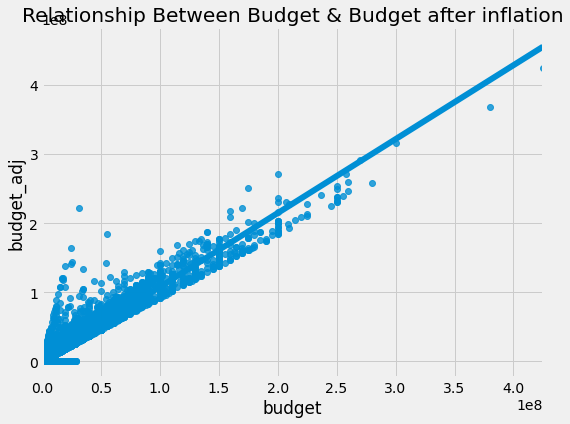

In [107]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Budget & Budget after inflation")
sns.regplot(x="budget", y="budget_adj", data=df)
plt.show()

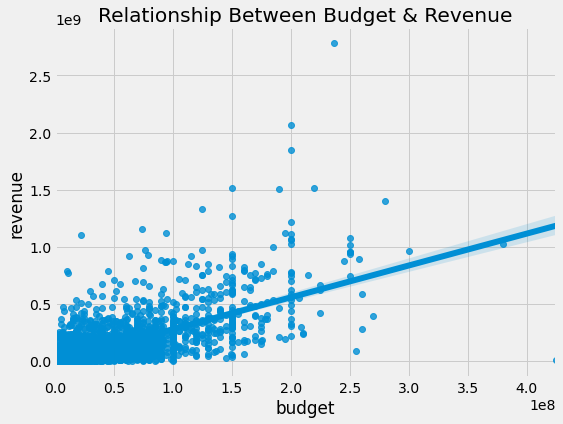

In [108]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Budget & Revenue")
sns.regplot(x="budget", y="revenue", data=df)
plt.show()

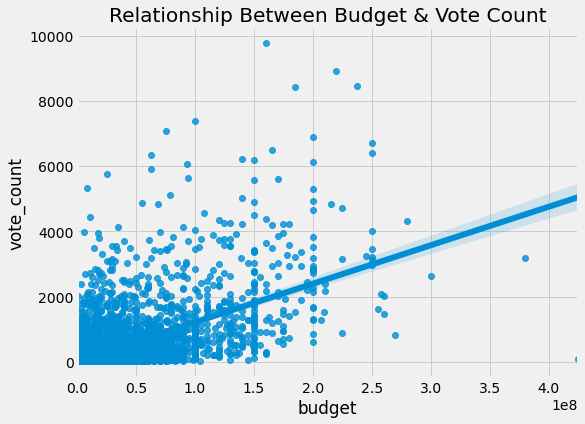

In [109]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Budget & Vote Count")
sns.regplot(x="budget", y="vote_count", data=df)
plt.show()

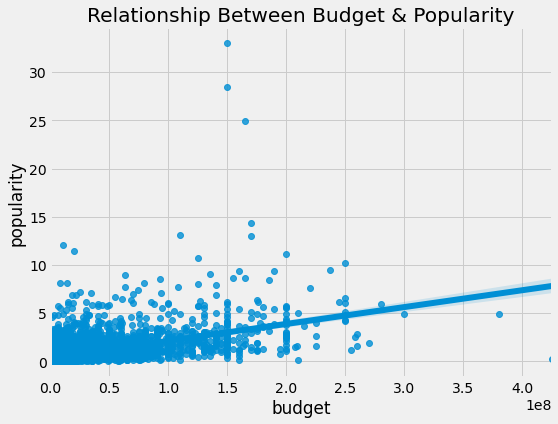

In [110]:
plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.title("Relationship Between Budget & Popularity")
sns.regplot(x="budget", y="popularity", data=df)
plt.show()

__Budget is positively correlated with 'budget_adj', 'revenue', 'vote_count' and 'popularity'__

### Question 12: Which cast participated in the most successful/flopped movies ?

In [85]:
#successful movie:
list_3= s.sort_values('popularity', axis=0, ascending=False).head(1).cast.values
list_3

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"],
      dtype=object)

name of the movie:

In [86]:
s.sort_values('popularity', axis=0, ascending=False).head(1).original_title

id
135397    Jurassic World
Name: original_title, dtype: object

In [87]:
#flopped movie:
list_4= flopped_movies.sort_values('popularity', axis=0, ascending=True).head(1).cast.values
list_4

array(['George C. Scott|Diana Rigg|Richard Dysart|Barnard Hughes|Stephen Elliott'],
      dtype=object)

name of the movie:

In [88]:
flopped_movies.sort_values('popularity', axis=0, ascending=True).head(1).original_title

id
32082    The Hospital
Name: original_title, dtype: object

<a id='conclusions'></a>
## Conclusions

In this project, I tried to analyse a dataset taken from The movie database (TMDb) of 10,000 movies.

The cleaning part is what I found the most interesting to do, I noticed that there are some `null values` and `duplicates` in the dataset, as well as `zero values` on some data points such as `budget`, `revenue` and `runtime`. 

There are some movies having the budget and revenue equals to 0, these can be considered as NaN values. Normally we can drop these zero values if they don't have an impact on the overall information about the dataset, but since I checked with the help of Shannon's Entropy, I found that We don't need to drop all the rows containing zeros in budget and revenue columns, since increasing in shanon's entropy is an indication of information loss. Also, some of the movies have a revenue but the budget is zero and vice versa! and that is really not realistic. So i changed the value of each budget to the mean overall budget to make it more realistic, and vice versa.

I also noticed that the release date is an `object` and not in a `date_time type`, so I tried to change it but I encountered a problem where each release date written for example as '11/15/66' is going to be converted to '2066-11-15' instead of 1966 as noted in the release_year, so I changed each year part in the release_date to the year noted in the release_year feature to solve the problem.

There were some columns I did not need in further analysis such as : imdb_id since we already have an id column, homepage, tagline, overview, and keywords since we're not doing a movie recommendation in this project, so I dropped them.

I also noticed that the runtime also has some zero values which is unrealistic! to tackle this problem I replaced each zero runtime with the mean overall runtime from each year.

Here are answers to some questions asked earlier: 

the most popular genres between 2015 and 1960 are : Action, Adventure, Science Fiction and Thriller
 
the top 5 movies having the most profit were: Jurassic World(2015) , Mad Max:Fury Road(2015), Insurgent(2015), Star Wars:The Force Awakens(2015) and Furious 7(2015).

the top 5 movies having the highest budget but the lowest vote counts: The Swan Princess: A Royal Family Tale(2014), Red Sky(2014), Mao's Last Dancer(2009), Sinners and Saints(2010) and Double Wedding(2010).

the top 5 movies who flopped in terms of profit: Jupiter Ascending, Ex Machina, Tomorrowland, Mr. Holmes and Room.

We can assume that Runtime and poularity aren't correlated based on graphs, also we can notice that having the most profit doesn't mean the movie is also popular; only 20% of the popular movies have also the highest profit.

### Limitations:

The dataset has alot of `zero values`, `null values` and wrong `format`, it makes it a bit hard for me to conduct a proper analysis, nevetherless, I found that an interesting problem to tackle.

Also, having the revenue columns filled with values when the budget columns has alot of `zero values` and vice versa was a non realistic thing and a problem that I found equally interesting. 

Another limitaion for me is conducting exploratory analysis with visualizations, I found that I'm more familiar with wrangling the data.

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Resources:

[geeksforgeeks](https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/)

[pandas.plotting.scatter_matrix](https://pandas.pydata.org/pandas-docs/version/1.2.4/reference/api/pandas.plotting.scatter_matrix.html)

[converting-object-to-datetime-format-in-python](https://stackoverflow.com/questions/38333954/converting-object-to-datetime-format-in-python)

[entropy-calculation-in-python](https://datascience.stackexchange.com/questions/58565/conditional-entropy-calculation-in-python-hyx)

[pandas.DataFrame.explode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html)

[split-explode-pandas-dataframe-string-entry-to-separate-rows](https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)

[pandas.DataFrame.plot.pie.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)
